In [138]:
# <editor-fold desc="import stuff">
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
# </editor-fold>


In [139]:
# <editor-fold desc="Make Dataframe">
path = "../Module4/DatafinitiElectronicsProductsPricingData.csv"
Review_df = pd.read_csv(path)
Review_df.columns = ['ID','Price','Price_min','available','condition','DateSeen','Sale','Merchant','ShippingMethod'    
              ,'asins','brand','categories','Added','Updated','ern','keys','manufacturer','ManufacturerNumber',
              'upc','weight']
# </editor-fold>

In [140]:
#let look at the columns
Review_df.columns

Index(['ID', 'Price', 'Price_min', 'available', 'condition', 'DateSeen',
       'Sale', 'Merchant', 'ShippingMethod', 'asins', 'brand', 'categories',
       'Added', 'Updated', 'ern', 'keys', 'manufacturer', 'ManufacturerNumber',
       'upc', 'weight'],
      dtype='object')

In [141]:
Review_df['Price'].describe() 
#the baseline for price is 517 dollar for any electronic.

count    6418.000000
mean      517.769811
std       796.676059
min         1.000000
25%        80.492500
50%       198.995000
75%       499.000000
max      6999.990000
Name: Price, dtype: float64

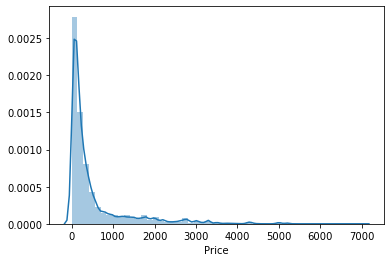

In [142]:
import seaborn as sns
sns.distplot(Review_df['Price'])

show positive skedness.
 peakness

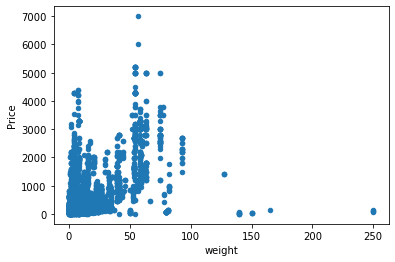

In [143]:
#bivariate analysis saleprice/grlivarea
var = 'weight'
data = pd.concat([Review_df['Price'], Review_df['weight']], axis=1)
data.plot.scatter(x=var, y='Price')

 
let eliminate the weight that are 200lbs or more

In [144]:
data = Review_df.drop(Review_df[Review_df['weight'] >= 100].index)

Text(0.5, 1.0, 'What weights 66 lbs?')

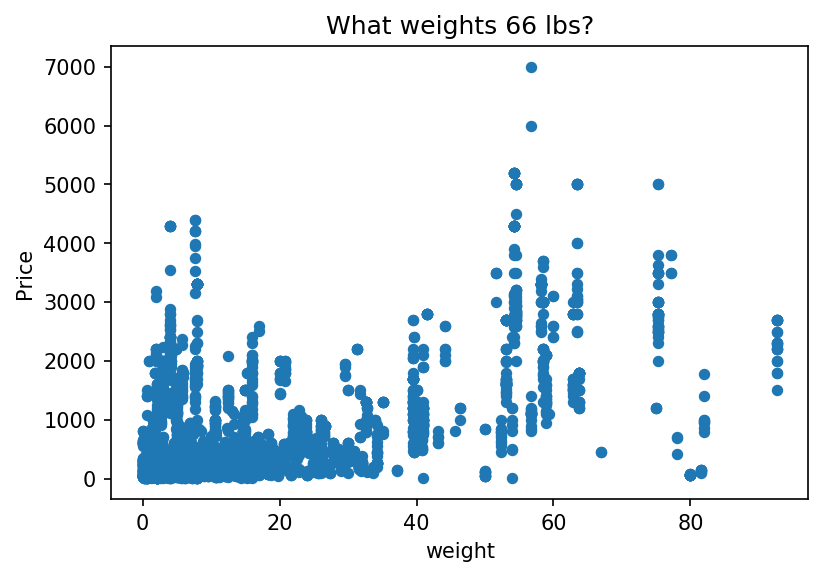

In [145]:
plt.rcParams['figure.dpi'] = 150
data.plot.scatter(x=var,y='Price')
#ax = plt.gca()
plt.title("What weights 66 lbs?")

#drop id, min, dateSeen, 
#categories is NPN
drop the following columns because these are the many ways to find out origin of products. Just need one orgin: ean, keys,  and , upc, asins
The Brand, manufacturer, and MFNumber are the same, if Samsung = sam1234, the Manufacturing number, then Sam1234 is Samsung. 
#use one date, or rewrite the date as number of months this product has been on the shelf. or how old it is from first being created.

In [146]:
import dateutil.parser
from datetime import date
Review_df['Added'] = pd.to_datetime(Review_df['Added'])
Review_df['yearAdded'] = Review_df['Added'].dt.year
Review_df['monthAdded']=Review_df["Added"].dt.month
Review_df['DateSeen'] = [x[0:20] for x in Review_df['DateSeen']]
Review_df['DateSeen'] = pd.to_datetime(Review_df['DateSeen'])
Review_df['YearSeen'] = Review_df['DateSeen'].dt.year
Review_df['MonthSeen']=Review_df['DateSeen'].dt.month
#print(d.strftime('%m/%d/%Y'))
#Review_df['Month_pass'] = abs((Review_df['DateSeen'].dt.year - Review_df['Added'].dt.year) * 12 + Review_df['MonthSeen'].dt.month - Review_df['Added'].dt.month)


In [147]:
##I wanted to seperated the 6 months, 6 month to 2 year and to more than 2 year products.

# <editor-fold desc="feature engineer for time 'NewOld'">
Review_df['Monthpass']= (Review_df['YearSeen'] - Review_df['yearAdded']) * 12
Review_df['MonthPassing']= abs(Review_df['MonthSeen'] - Review_df['monthAdded'])
Review_df['MonthPassing']
Review_df.dtypes
Review_df['months'] = Review_df['Monthpass'] + Review_df['MonthPassing']
Review_df['NewOld'] = pd.cut(Review_df['months'], bins=[-100,6,24,36,1000], labels=['New','OneYear','TwoYear','Old'])
Review_df['NewOld'].value_counts()
Review_df['NewOld'].isna().sum()
# </editor-fold>

0

In [148]:
Review_df['Merchant'].value_counts().iloc[:40].index

Index(['Bestbuy.com', 'bhphotovideo.com', 'Walmart.com', 'Beach Camera',
       'AMI Ventures Inc', 'buydig', 'Focus Camera', 'gear4less',
       'echo-and-optics', 'Best Buy', 'UnbeatableSale', 'Beach Audio Inc',
       'DealClock', 'electronic_express',
       'Electronics Expo (Authorized Dealer)', 'World Wide Stereo', 'BuyVPC',
       'Video & Audio Center', 'Car Audio Closeout', 'Electronic Express',
       'OneCall', 'wwstereo', 'The Pixel Hub', 'OutletPC', 'DemProductSales',
       'antonline.com', 'Wholesale Connection', 'Newegg', 'extremenetwork',
       'My Goods', 'Technology Galaxy', 'Clover Hill', 'outletmp3',
       'videoandaudiocenter', 'Dell.com', 'eLGeo Electronics',
       'www-sonicelectronix-com', 'DiamondBuy', 'Growkart',
       'Sam Ash Music Direct'],
      dtype='object')

What is the count of the merchant? Let rewrite Merchant into only 5 merchant, Bestbuy, BHphoto, Walmart, Beach and others. 

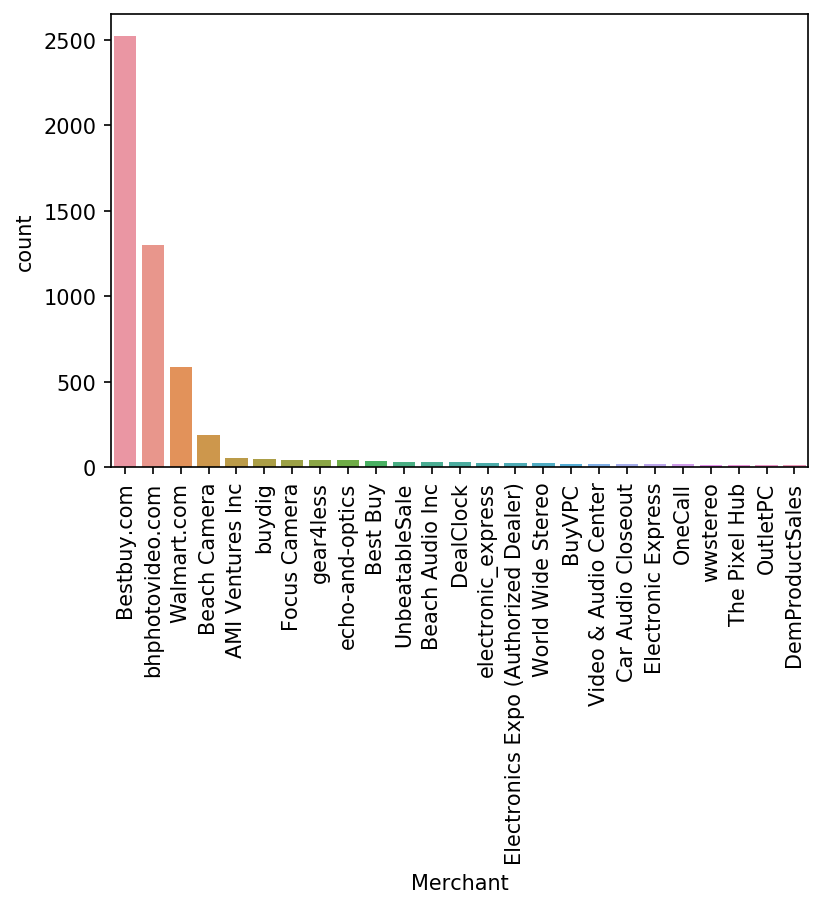

In [149]:
import matplotlib.pyplot as plt
Review_df['Merchant'] 
sns.countplot(x='Merchant', data=Review_df, order = Review_df['Merchant'].value_counts().iloc[:25].index);
plt.xticks(rotation=90);

In [150]:
Replace = {'Bestbuy.com' : 'BestBuy', 'bhphotovideo.com': 'BH', 'Walmart.com': 'Walmart'
           ,'Beach Camera':'Beach'}
Topforty = ['Bestbuy.com', 'bhphotovideo.com', 'Walmart.com', 'Beach Camera', 'AMI Ventures Inc', 'buydig', 'Focus Camera', 'gear4less',\
           'echo-and-optics', 'Best Buy', 'Beach Audio Inc', 'UnbeatableSale',\
           'DealClock', 'electronic_express', 'World Wide Stereo',\
           'Electronics Expo (Authorized Dealer)', 'BuyVPC',\
           'Video & Audio Center', 'Car Audio Closeout', 'OneCall',\
           'Electronic Express', 'OutletPC', 'The Pixel Hub', 'wwstereo',\
           'DemProductSales', 'antonline.com', 'Newegg', 'Wholesale Connection',\
           'extremenetwork', 'My Goods', 'Technology Galaxy', 'eLGeo Electronics',\
           'Growkart', 'outletmp3', 'Clover Hill', 'videoandaudiocenter',\
           'Dell.com', 'DiamondBuy', 'www-sonicelectronix-com', 'Sam Ash Music Direct']
Review_df['Merchant'] = np.where(Review_df['Merchant'].isin(['Bestbuy.com', 'bhphotovideo.com',
                                                             'Walmart.com','Beach Camera']),
                            Review_df['Merchant'], 'Others')

In [151]:
Review_df['Merchant'].value_counts()

Bestbuy.com         2524
Others              1816
bhphotovideo.com    1300
Walmart.com          589
Beach Camera         189
Name: Merchant, dtype: int64

In [152]:
Review_df.categories

0       Electronics.Home Audio & Theater.Home Audio.Al...
1       ##############################################...
2       Computers.Memory (RAM).Computers & Accessories...
3       ##############################################...
4       ##############################################...
                              ...                        
6413    ##############################################...
6414    Computers.Shop Laptops by Type.Computers & Acc...
6415    TVs & Electronics.Carrier Cell Phones.Phones.P...
6416    ##############################################...
6417    ##############################################...
Name: categories, Length: 6418, dtype: object

In [153]:
Review_df.columns

Index(['ID', 'Price', 'Price_min', 'available', 'condition', 'DateSeen',
       'Sale', 'Merchant', 'ShippingMethod', 'asins', 'brand', 'categories',
       'Added', 'Updated', 'ern', 'keys', 'manufacturer', 'ManufacturerNumber',
       'upc', 'weight', 'yearAdded', 'monthAdded', 'YearSeen', 'MonthSeen',
       'Monthpass', 'MonthPassing', 'months', 'NewOld'],
      dtype='object')

In [154]:
# <editor-fold desc="Cardinality and target">
target = 'Price'

train_features = Review_df.drop(columns=[target,'ID', 'Price_min','yearAdded','monthAdded','YearSeen',
                                         'MonthSeen','Monthpass','MonthPassing','months'])
#In the dataframe, grab all the numeric columns, then list it into columns. Finally turn it into array.
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
#This (not a number) columns has how many unique categories?
cardinality = train_features.select_dtypes(exclude='number').nunique()
#if this columns has less than 50 keep that column, and turn it into array. (important step for panda ARRAY)
categorical_features = cardinality[cardinality <= 50].index.tolist()
#combine the list
features = numeric_features + categorical_features
# </editor-fold>


In [155]:
features

['weight',
 'available',
 'condition',
 'Sale',
 'Merchant',
 'ShippingMethod',
 'NewOld']

In [156]:
# <editor-fold desc="train, test validate part here">
# <editor-fold desc="train_test_split model">
from sklearn.model_selection import train_test_split
#let train, validate and test one dataframe into .70, .20, .10
train_ratio = .70
validation_ratio = .20
test_ratio = .10

train, test = train_test_split(Review_df, test_size = 1 - train_ratio)
validate, test = train_test_split(test, test_size=test_ratio/(test_ratio+validation_ratio))
# </editor-fold>
# </editor-fold>

In [157]:
# <editor-fold desc="X train, validate, and test">
X_train = train[features]
y_train = train[target]

X_validate = validate[features]
y_validate = validate[target]

X_test = test[features]
y_test = test[target]
# </editor-fold>

In [158]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.feature_selection import f_classif, SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [159]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [160]:

pipeline_OHE_XGRegressor = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    XGBRegressor(max_depth=5),
    
)

In [161]:
features

['weight',
 'available',
 'condition',
 'Sale',
 'Merchant',
 'ShippingMethod',
 'NewOld']

In [170]:
'''
OneHot encoder because each features is 7 or less. And the feature that has been engineer are specific design to be in its own category.
SelectKbest - will just fold the 3,500 small sample size.
XGBR is a beast
'''


pipelineForSearchCV = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SelectKBest(f_regression),
    XGBRegressor(max_depth=5)
)

param_distributions= {
    'selectkbest__k' : range(1, len(X_train.columns)+1)
}
search = RandomizedSearchCV(
    pipelineForSearchCV,
    param_distributions=param_distributions,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

In [171]:
pipeline_OHE_XGRegressor.fit(X_train,y_train)

[02:50:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['available', 'condition', 'Merchant',
                                     'ShippingMethod', 'NewOld'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=5, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=

In [172]:
print(pipeline_OHE_XGRegressor)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['available', 'condition', 'Merchant',
                                     'ShippingMethod', 'NewOld'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=5, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=

In [208]:
from sklearn.metrics import r2_score

y_pred_OHE_XGregressor = pipeline_OHE_XGRegressor.predict(X_validate)
print('validation Accuracy', r2_score(y_validate,y_pred_OHE_XGregressor))
      
y_pred_test_OHE_XGregressor = pipeline_OHE_XGRegressor.predict(X_test)
print('test accuracy', r2_score(y_test, y_pred_test_OHE_XGregressor))




validation Accuracy 0.7963470548967462
test accuracy 0.7973058830135182


In [174]:
'''
aight score. There is probably one Column, 'categories,​ that I want to use to ckearly identify the electronic, 
but requires NLP. When I developed my skills more, i will come back to NLP.

'''

"\naight score. There is probably one Column, 'categories,\u200b that I want to use to ckearly identify the electronic, \nbut requires NLP. When I developed my skills more, i will come back to NLP.\n\n"

In [175]:
feature_names = pipeline_OHE_XGRegressor.named_steps['onehotencoder'].get_feature_names()
np.array(feature_names)


array(['weight', 'available_TRUE', 'available_No',
       'available_Special Order', 'condition_New', 'condition_new',
       'condition_Refurbished', 'condition_Used',
       'condition_Manufacturer refurbished',
       'condition_Seller refurbished', 'condition_refurbished',
       'condition_pre-owned', 'Sale', 'Merchant_Bestbuy.com',
       'Merchant_Beach Camera', 'Merchant_Others',
       'Merchant_bhphotovideo.com', 'Merchant_Walmart.com',
       'ShippingMethod_nan', 'ShippingMethod_Standard',
       'ShippingMethod_Free', 'ShippingMethod_Freight',
       'ShippingMethod_FREE', 'ShippingMethod_Expedited',
       'ShippingMethod_Free Expedited Shipping',
       'ShippingMethod_Free Delivery', 'NewOld_New', 'NewOld_OneYear',
       'NewOld_TwoYear', 'NewOld_Old'], dtype='<U38')

In [176]:
search.fit(X_train,y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  16 out of  35 | elapsed:    0.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  24 out of  35 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.5s finished


[02:50:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('onehotencoder',
                                              OneHotEncoder(cols=None,
                                                            drop_invariant=False,
                                                            handle_missing='value',
                                                            handle_unknown='value',
                                                            return_df=True,
                                                            use_cat_names=True,
                                                            verbose=0)),
                                             ('selectkbest',
                                              SelectKBest(k=10,
                                                          score_func=<function f_regression at 0x00000153BD9FAC18>)),
                                   

In [181]:
from sklearn.metrics import mean_absolute_error
PredictWThis=search.best_estimator_
y_pred_W_OHE_Kbest_XGReg_RandomSearchCV=PredictWThis.predict(X_validate)
mae = mean_absolute_error(y_validate,y_pred_W_OHE_Kbest_XGReg_RandomSearchCV)
error = r2_score(y_validate, y_pred_W_OHE_Kbest_XGReg_RandomSearchCV)
print( f'TEST MEA: ${mae:,.0f}' )
print('Mean Absolute Error seems high 200 dollar off is incredible dangoeus. You are getting ripped off by this model')

TEST MEA: $207
Mean Absolute Error seems high 200 dollar off is incredible dangoeus. You are getting ripped off by this model


In [182]:
# mean absolute error seems fairly high. 
print(error)



0.7710291478778286


In [183]:
import joblib as job

job.dump(pipeline_OHE_XGRegressor, 'pipeline_OHE_XGRegressor.joblib', compress=True)


['pipeline_OHE_XGRegressor.joblib']

In [184]:
X_train.columns

Index(['weight', 'available', 'condition', 'Sale', 'Merchant',
       'ShippingMethod', 'NewOld'],
      dtype='object')

In [185]:
#

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
encoder = ce.OneHotEncoder()
X_train_encoder = encoder.fit_transform(X_train)
X_val_encoder = encoder.transform(X_validate)
eval_set = [(X_train_encoder, y_train),
        (X_val_encoder, y_validate)]

model = XGBRegressor()

model.fit(X_train_encoder, y_train, eval_set=eval_set)

[02:51:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:912.764	validation_1-rmse:829.371
[1]	validation_0-rmse:858.96	validation_1-rmse:778.888
[2]	validation_0-rmse:813.081	validation_1-rmse:734.556
[3]	validation_0-rmse:772.783	validation_1-rmse:698.055
[4]	validation_0-rmse:739.078	validation_1-rmse:666.259
[5]	validation_0-rmse:709.856	validation_1-rmse:638.6
[6]	validation_0-rmse:683.819	validation_1-rmse:615.509
[7]	validation_0-rmse:661.81	validation_1-rmse:597.06
[8]	validation_0-rmse:643.375	validation_1-rmse:581.505
[9]	validation_0-rmse:627.345	validation_1-rmse:568.751
[10]	validation_0-rmse:611.435	validation_1-rmse:554.934
[11]	validation_0-rmse:598.613	validation_1-rmse:544.851
[12]	validation_0-rmse:588.596	validation_1-rmse:537.797
[13]	validation_0-rmse:578.159	validation_1-rmse:528.551
[14]	validation_0-rmse:570.59	validation_1-rmse:522.675
[15]	validation_0-rmse:562.813	validation_1-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

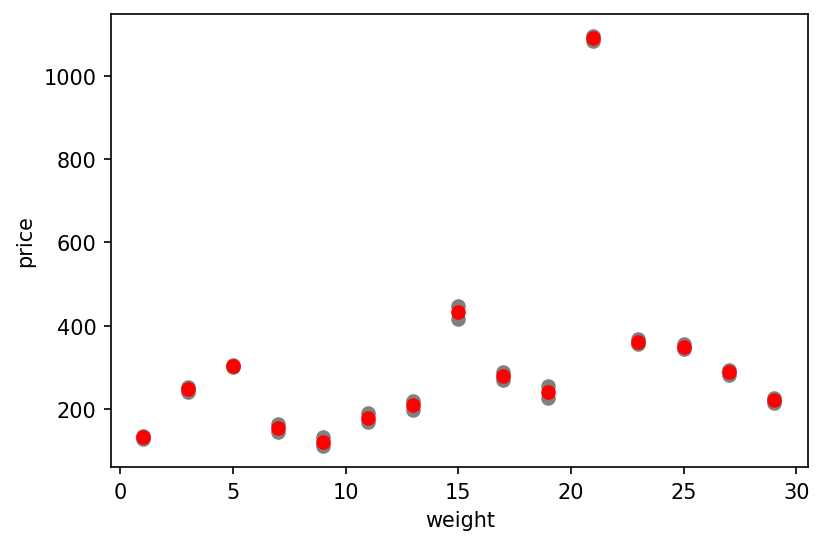

In [209]:
'''
As one can see the predicted will always be between the mean. 
The weight of the electronic seem to haev a hugh influence on the price.
This plot is another way to look at MAE. But damn it is not a really great model. 

'''

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

example = X_validate.iloc[[0]]
example2 = X_validate.iloc[[2]]

examples = pd.concat([example, example2])
for price in range(1, 30, 2):
    examples['weight'] = price
    preds = pipeline_OHE_XGRegressor.predict(examples)
    for pred in preds:
        plt.scatter(price,pred,color='grey')
    plt.scatter(price, np.mean(preds), color='red')
    plt.xlabel('weight')
    plt.ylabel('price')

(0, 55)

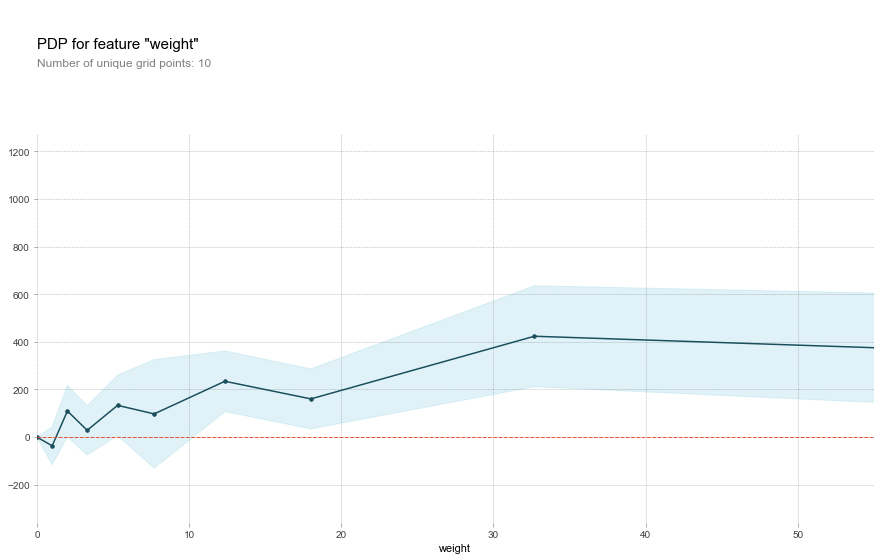

In [187]:

from pdpbox.pdp import pdp_isolate, pdp_plot
##gb is pipeline_make of ordinalEncoder, XGBREGRESSOR
#X_val is dataset
#model feature is the features of X_val columns
#
feature = 'weight'
isolated = pdp_isolate(
    model=pipeline_OHE_XGRegressor,
    dataset=X_validate,
    model_features=X_validate.columns,
    feature=feature
)
pdp_plot(isolated, feature_name=feature);
plt.xlim(0,55)


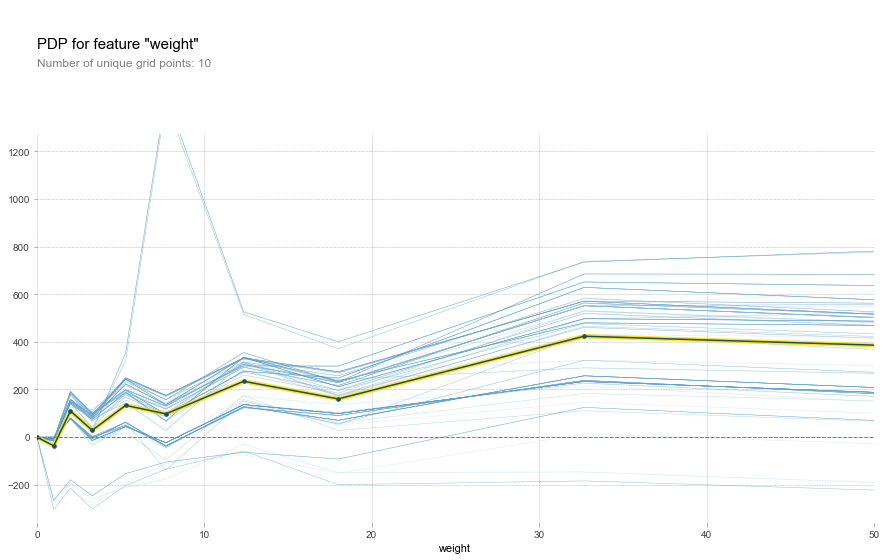

In [188]:
'''
This plot is for multiply of lines. 
'''

pdp_plot(isolated,feature_name = feature, plot_lines=True, frac_to_plot=100)
plt.xlim(0,50);

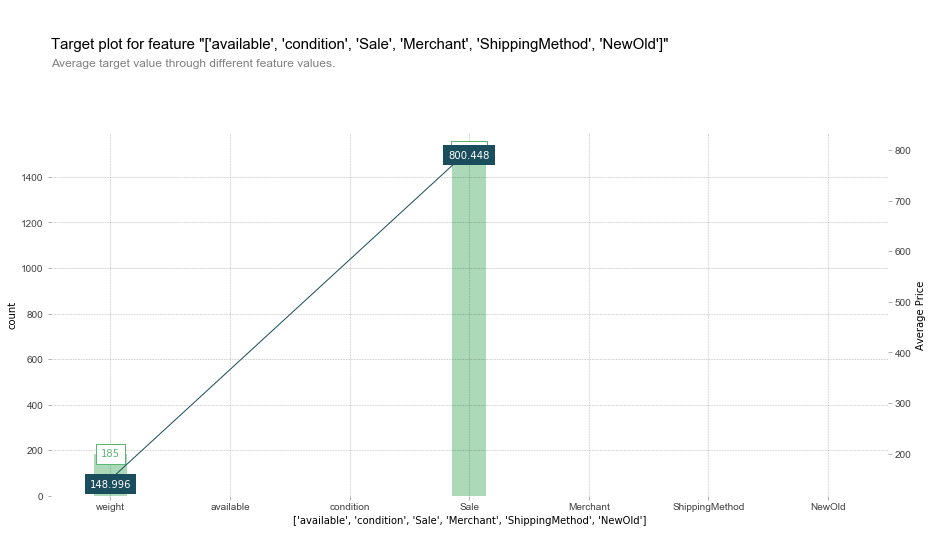

In [189]:
from pdpbox import info_plots, get_dataset

fig, axes, summary_df = info_plots.target_plot(
    df = Review_df, feature = ['weight','available', 'condition', 'Sale', 'Merchant', 'ShippingMethod', 'NewOld'],
    feature_name=['available', 'condition', 'Sale', 'Merchant', 'ShippingMethod', 'NewOld'], target='Price'
)

In [190]:
X_train.columns

Index(['weight', 'available', 'condition', 'Sale', 'Merchant',
       'ShippingMethod', 'NewOld'],
      dtype='object')

In [191]:
X_train['Sale'].value_counts()


False    3401
True     1091
Name: Sale, dtype: int64

In [192]:
#weight,Sale,Price,
#available_No,           available_Special             Order,available_TRUE,
#condition_Manufacturer refurbished,         condition_New,condition_Refurbished,
#condition_Seller refurbished,       condition_Used,     
#condition_new,   condition_pre-owned,         condition_refurbished,

#Merchant_Beach Camera,Merchant_Bestbuy.com,Merchant_Others,Merchant_Walmart.com,Merchant_bhphotovideo.com,
#ShippingMethod_CAD 18.61,ShippingMethod_Expedited,ShippingMethod_FREE,ShippingMethod_Free,
#ShippingMethod_Free Delivery,ShippingMethod_Free Expedited Shipping,ShippingMethod_Freight,
#ShippingMethod_Standard,

#NewOld_New,NewOld_OneYear,NewOld_TwoYear,NewOld_Old
#

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
encoder = ce.OneHotEncoder()
X_train_encoder = encoder.fit_transform(X_train)
X_val_encoder = encoder.transform(X_validate)
eval_set = [(X_train_encoder, y_train),
        (X_val_encoder, y_validate)]

model = XGBRegressor()

model.fit(X_train_encoder, y_train, eval_set=eval_set)

[02:51:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:912.764	validation_1-rmse:829.371
[1]	validation_0-rmse:858.96	validation_1-rmse:778.888
[2]	validation_0-rmse:813.081	validation_1-rmse:734.556
[3]	validation_0-rmse:772.783	validation_1-rmse:698.055
[4]	validation_0-rmse:739.078	validation_1-rmse:666.259
[5]	validation_0-rmse:709.856	validation_1-rmse:638.6
[6]	validation_0-rmse:683.819	validation_1-rmse:615.509
[7]	validation_0-rmse:661.81	validation_1-rmse:597.06
[8]	validation_0-rmse:643.375	validation_1-rmse:581.505
[9]	validation_0-rmse:627.345	validation_1-rmse:568.751
[10]	validation_0-rmse:611.435	validation_1-rmse:554.934
[11]	validation_0-rmse:598.613	validation_1-rmse:544.851
[12]	validation_0-rmse:588.596	validation_1-rmse:537.797
[13]	validation_0-rmse:578.159	validation_1-rmse:528.551
[14]	validation_0-rmse:570.59	validation_1-rmse:522.675
[15]	validation_0-rmse:562.813	validation_1-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [193]:
import shap
import xgboost
import shap
#featuresForShapley
def BlackBox(weight, available_1, available_2, available_3, condition_1, condition_2, condition_3, condition_4, condition_5, condition_6, condition_7, condition_8, Sale, Merchant_1, Merchant_2, Merchant_3, Merchant_4, Merchant_5, ShippingMethod_1, ShippingMethod_2, ShippingMethod_3, ShippingMethod_4, ShippingMethod_5, ShippingMethod_6, ShippingMethod_7, ShippingMethod_8, NewOld_1, NewOld_2, NewOld_3, NewOld_4):
    df = pd.DataFrame(data = [[weight, available_1, available_2, available_3, condition_1, condition_2, condition_3, condition_4, condition_5, condition_6, condition_7, condition_8, Sale, Merchant_1, Merchant_2, Merchant_3, Merchant_4, Merchant_5, ShippingMethod_1, ShippingMethod_2, ShippingMethod_3, ShippingMethod_4, ShippingMethod_5, ShippingMethod_6, ShippingMethod_7, ShippingMethod_8, NewOld_1, NewOld_2, NewOld_3, NewOld_4]],
                      columns =['weight', 
                                'available_1', 'available_2', 'available_3', 
                                'condition_1', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'condition_6', 
                                'condition_7', 'condition_8', 
                                'Sale', 
                                'Merchant_1', 'Merchant_2', 'Merchant_3', 'Merchant_4', 'Merchant_5', 
                                'ShippingMethod_1', 'ShippingMethod_2', 'ShippingMethod_3', 'ShippingMethod_4', 
                                'ShippingMethod_5', 'ShippingMethod_6', 'ShippingMethod_7', 'ShippingMethod_8', 
                                'NewOld_1', 'NewOld_2', 'NewOld_3', 'NewOld_4']) 
    pred = model.predict(df)[0]
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(df)
    
    feature_names = df.columns
    feature_values = df.values[0]
    
    result = f'price is estimated at {pred:,.0f} for this electronic \n'
    result += f'Starting from a baseline of ${explainer.expected_value:,.0f} \n'

    print(result)
    
    shap.initjs()
    return shap.force_plot(
        base_value = explainer.expected_value,
        shap_values=shap_values,
        features=df
    )

In [207]:
import shap
shap.initjs() 
BlackBox(1,  #weight
         0,0,1,      #  not avai, special order, available
         0,0,1,0,0,0,0,0,    #condition?MNF Refurbished, used, new. pre_owned, refurbished, 
         0,0,1,0,0,  #beach,  bestbuy, other,  walmart, bpvideophotos
         1,0,0,0,0,0,0,0,0, #Shipping
         0,1,0,0) # new? 1 year old, 2 yr old, old

price is estimated at 184 for this electronic 
Starting from a baseline of $531 

